# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# (a) Load data (features)
def load_data():
    x = np.load('features.npy', allow_pickle=True)
    #standardizes each column individually
    data = (x-np.mean(x, axis=0))/np.std(x, axis=0)
    return data

In [4]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    #takes in standardized data set as input
    #computes the covariance matrix
    c_matrix = np.cov(X, rowvar=False)
    #include the eigenvalues in your report
    eig_vals, eig_vecs = np.linalg.eig(c_matrix)

    #returns the sorted eigenvalues in descending order and the corresdponding eigenvectors
    sorted_idx = np.argsort(eig_vals)[::-1]
    sorted_eig_vals = eig_vals[sorted_idx]
    sorted_eig_vecs = eig_vecs[:,sorted_idx]
    return (sorted_eig_vals, sorted_eig_vecs)

In [12]:
# (c) Evaluate using variance_explained as the metric
#iterates through dimesionality k from 1 to the no. of dimensions in the input features
#computes the vriance explained on reducing the dimensionality to k (b)
def eval():
    X = load_data()
    k = X.shape[1] +1
    sorted_eig_vals, sorted_eig_vecs = eigendecomp(X)
    print('   variance     eig_vals')
    #iterate through dimensionality k from 1 to no. of dimensions in the input features
    for i in range(1, k):
        #include the eigenvalues for each k in your report
        variance = (np.sum(np.abs(sorted_eig_vals[:i]))/np.sum(np.abs(sorted_eig_vals))).round(2)*100
        #Print the variance explained as a function of k
        print('k:', i, '=>', variance, '%,', sorted_eig_vals[:i])
    #which value would you pick and why
    print("I would pick k=3 because it represents the data well with a low loss \nof only 3% in data representation, and greatly no. of the feature size")


In [13]:
#Write a function that projects the original data to a 2‐dimensional feature subspace   
def viz():
    X = load_data()
    k = 2
    sorted_eig_vals, sorted_eig_vecs = eigendecomp(X)
    eig_vals_set = sorted_eig_vecs[:, 0:k]
    X_reduced = np.dot(eig_vals_set.T, X.T).T
    # print(X_reduced)
    
    #load the labels
    y = np.load('labels.npy', allow_pickle=True)#.reshape(-1, 1)
    colors = ['r', 'b', 'g']
    markers = ['o', 'o', 'o']
    for l, c, m in zip(np.unique(y), colors, markers):
        #plot the 2D representation as a scatter plot with labels as legends
        plt.scatter(X_reduced[y==l,0], X_reduced[y==l, 1], c=c, label='label '+str(l), marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('Data in 2-D subspace')
    plt.legend(loc='upper left')
    plt.show()


   variance     eig_vals
k: 1 => 59.0 %, [4.74298961]
k: 2 => 87.0 %, [4.74298961 2.29585309]
k: 3 => 97.0 %, [4.74298961 2.29585309 0.77691051]
k: 4 => 100.0 %, [4.74298961 2.29585309 0.77691051 0.2041729 ]
k: 5 => 100.0 %, [4.74298961 2.29585309 0.77691051 0.2041729  0.03376517]
k: 6 => 100.0 %, [4.74298961e+00 2.29585309e+00 7.76910512e-01 2.04172901e-01
 3.37651661e-02 5.43907795e-17]
k: 7 => 100.0 %, [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  5.43907795e-17 -1.85461428e-16]
k: 8 => 100.0 %, [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02  5.43907795e-17 -1.85461428e-16 -5.77463648e-16]
I would pick k=3 because it represents the data well with a low loss 
of only 3% in data representation, and greatly no. of the feature size


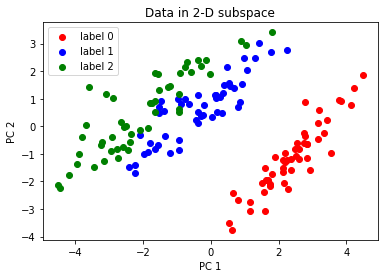

In [14]:
def main():

    eval()
    viz()

if __name__ == "__main__":
    main()

![title](plotqe2_1.png)
